## Examples of clustering algorithms in Python

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import pandas as pd
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()

K-Means falls under the category of centroid-based clustering.
We are looking at the Titanic dataset, and removing the 'survived' value, therefore the task is to cluster the people into 2 groups "survived" and "did not survive" with unsupervised learning tools.
https://www.datacamp.com/community/tutorials/k-means-clustering-python

In [183]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [184]:
#preview data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The survived class column is used in our training data set, but not in our testing dataset to see if we get the clustering "correct".

K-Means does not handle missing data, we need to see what data are missing.

In [185]:
train.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [186]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


We do not want to remove the rows with missing data, or the 'Cabin' or 'Age' column entirely. Instead we will impute (infer) some data for the missing values. We will use the mean value for the entire column in both the training and test datasets.

In [187]:
# Fill missing values with mean column values in the train set
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

In [188]:
#double check to see that all NAs are filled in. A

train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

what is percent missing for Cabin?

In [189]:
train['Cabin'].isna().sum()/len(train)

0.7710437710437711

Because the 'Cabin' and 'Embarked' data variables are not numeric, we could not find a mean to replace them. Let's see the values in Cabin:

In [190]:
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

It looks like there is a letter that represents something about the ship 'A', 'B', 'C'. It would be nice to use these data, but with so manny missing, 77% let's just remove this column all together, as guessing or filling things in could be erroneous.

In [191]:
train=train.drop(columns=['Cabin'])
test=test.drop(columns=['Cabin'])

In [192]:
#View values in Embarked
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

I still do not know how to interpolate the embarked column, so we will simply remove those columns with NA

In [193]:
train[train['Embarked'].isna()]

#or train[train.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [194]:
train=train[train.notnull()]
test=test[test.notnull()]

In [195]:
#double check we removed all NAs

train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [196]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## We have removed or interpolated all null data, let's move on!

Survival count with respect to gender:

In [197]:
train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()
#this is the mean of 0 and 1, so this is basically the percentage if there are 5 '0' and 10 '1', the mean of this would be 10/15 = 0.66

,Sex,Survived
0,female,0.742038
1,male,0.188908


This shows that in the training data roughly 74% of women survived while only 19% of men survived.

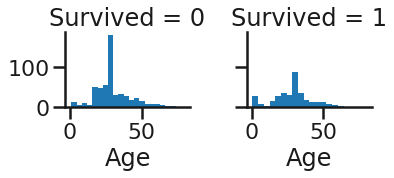

In [198]:
#plot age vs survived 
#sns is seaborn package

g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

K-means clustering wants all numeric data, so what variable types do we have?

In [199]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


Name, Sex, Ticket, and Embarked are non-numeric data. for simplicity, we will remove thise columlns

In [200]:
train=train.drop(['Name', 'Ticket', 'Embarked'], axis=1)
test=test.drop(['Name', 'Ticket', 'Embarked'], axis=1)

In [201]:
#convert sex from male female to 0,1
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
#labelEncoder.transform(train['Sex'])
#can do with label encoder, or just hard code


LabelEncoder()

In [202]:
test['Sex'].unique()

array(['male', 'female'], dtype=object)

In [205]:
test.Sex[test.Sex=='male']=0
test.Sex[test.Sex=='female']=1

train.loc[train['Sex'] =='male', 'Sex']=0
train.loc[train['Sex'] =='female', 'Sex']=1

/home/natalie/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/natalie/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [237]:
#we need to drop the survived column for our training dataset, so it does not use this column as data, but instead it will be used to check our clustering.

X=np.array(train.drop(['Survived'], 1).astype(float)) #this converts to all numeric array with no headers or variable names

Y = np.array(train['Survived'])

Build n=2 clusters with Kmeans, meaning we minimize the distance for all datapoints within eachh group to the groups centeroid.

In [296]:
#train.drop(['Survived'], axis=1)

In [262]:
from sklearn.cluster import KMeans
#build the algorithim you will use
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

Let's see how well our model did

In [294]:
#y_kmeans==train['Survived']
train['output']=0

count=0
for i in range(len(train)):
    if y_kmeans[i]==train.Survived[i]:
        train['output'][i]=1
        count += 1

/home/natalie/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [282]:
count/len(train)
#This indicates we got about 50% correct

0.5084175084175084

Let's see if any groups are better predicted than others:

In [298]:
train[['Sex','output']].groupby(['Sex'], as_index=False).mean()
#this looks like we got about equal representation of those right in the male and female groups

,Sex,output
0,0,0.497400
1,1,0.528662


In [299]:
train[['Survived', 'output']].groupby(['Survived'], as_index=False).mean()

,Survived,output
0,0,0.506375
1,1,0.511696


In [ ]:
#likewise, about 50% were classified correctly in the survived

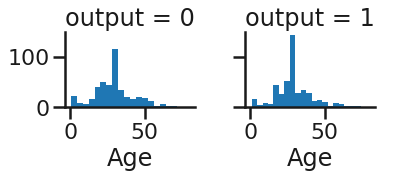

In [297]:
g = sns.FacetGrid(train, col='output')
g.map(plt.hist, 'Age', bins=20)

K means uses Expectation–Maximization:
    
    Guess some cluster centers
    Repeat until converged
        E-Step: assign points to the nearest cluster center
        M-Step: set the cluster centers to the mean
